Гузь Владислав, лабораторна 1.

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import pandas as pd


Завантажуємо дані та розділяємо на тренувальні і тестові.

In [ ]:
data = pd.read_csv('NAICExpense.csv', sep=',', usecols=['EXPENSES', 'GPWPERSONAL', 'GPWCOMM', 'ASSETS', 'CASH', 'LIQUIDRATIO'])
data = data.to_numpy()
train, test = data[:304], data[304:]
trainx, trainy, testx, testy = train[:, 1:], train[:, :1].reshape(train.shape[0]), test[:, 1:], test[:, :1].reshape(test.shape[0])

Спочатку натренуємо три моделі: звичайну лінійну регрессію, потім скористаємося регуляризацією, натренуємо Lasso та гребеневу регрессію.

In [ ]:
LM = lm.LinearRegression(normalize=True)
LM = LM.fit(trainx, trainy)
LMscoreTrain = LM.score(trainx, trainy)
LMscoreTest = LM.score(testx, testy)

Lasso = lm.Lasso(alpha = 0.1, normalize=False)
Lasso = Lasso.fit(trainx, trainy)
LassoscoreTrain = Lasso.score(trainx, trainy)
LassoscoreTest = Lasso.score(testx, testy)

Ridge = lm.Ridge(alpha=3, normalize=True)
Ridge = Ridge.fit(trainx, trainy)
RidgescoreTrain = Ridge.score(trainx, trainy)
RidgescoreTest = Ridge.score(testx, testy)

In [64]:
print('Linear Regression. Training accuracy: {} %'.format(100*LMscoreTrain))
print('Linear Regression. Testing accuracy: {} %\n'.format(100*LMscoreTest))
print('LASSO. Training accuracy: {} %'.format(100*LassoscoreTrain))
print('LASSO. Testing accuracy: {} %\n'.format(100*LassoscoreTest))
print('Ridge Regression. Training accuracy: {} %'.format(100*RidgescoreTrain))
print('Ridge Regression. Testing accuracy: {} %'.format(100*RidgescoreTest))

Linear Regression. Training accuracy: 92.50628221349182 %
Linear Regression. Testing accuracy: 55.64709739268753 %

LASSO. Training accuracy: 24.429251586559854 %
LASSO. Testing accuracy: 22.406429086778367 %

Ridge Regression. Training accuracy: 68.43304878444582 %
Ridge Regression. Testing accuracy: 58.42392563844274 %


Видно, що регуляризацію використано не даремно: звичайна лінійна модель перевчилася, а штрафування хоч і знизило точність, впоралось із перенавчанням.

Більш-менш гарний результат дає гребенева регресія, тому використаємо таку модель потім, а поки що побудуємо ОНК

In [ ]:
OLS = sm.OLS(trainy, trainx)
trained = OLS.fit()
trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              828.4
Date:                Thu, 24 Jun 2021   Prob (F-statistic):                   8.19e-173
Time:                        22:35:28   Log-Likelihood:                          575.98
No. Observations:                 304   AIC:                                     -1142.
Df Residuals:                     299   BIC:                                     -1123.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3044      0.015     20.495      0.000       0.275       0.334
x2             0.1845      0.013     13.683      0.000       0.158       0.211
x3             0.0353      0.023      1.514      0.131      -0.011       0.081
x4            -0.0159      0.022     -0.708      0.480      -0.060       0.028
x5         -1.786e-05   2.41e-05     -0.741      0.459   -6.53e-05    2.96e-05
==============================================================================
Omnibus:                      131.499   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2554.662
Skew:                          -1.253   Prob(JB):                         0.00
Kurtosis:                      16.979   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
trained.cov_params()

array([[ 2.20524364e-04, -1.95022529e-05, -3.15214191e-05,
         1.18477272e-05, -3.40881725e-08],
       [-1.95022529e-05,  1.81818160e-04, -1.79136722e-04,
         1.40188819e-04, -3.61530942e-08],
       [-3.15214191e-05, -1.79136722e-04,  5.43910627e-04,
        -5.15578564e-04,  2.41905929e-08],
       [ 1.18477272e-05,  1.40188819e-04, -5.15578564e-04,
         5.03034596e-04, -2.68407056e-08],
       [-3.40881725e-08, -3.61530942e-08,  2.41905929e-08,
        -2.68407056e-08,  5.80717403e-10]])

Дисперсія:

In [ ]:
trained.cov_params().var()

5.063952077993786e-08

Тепер, спробуємо видалити рядок з найбільним значенням p-value.

In [ ]:
OLS = sm.OLS(trainy, np.concatenate([trainx[:, :-2], trainx[:, -1:]], axis=1))
trained = OLS.fit()
trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              1037.
Date:                Thu, 24 Jun 2021   Prob (F-statistic):                   3.07e-174
Time:                        22:54:23   Log-Likelihood:                          575.73
No. Observations:                 304   AIC:                                     -1143.
Df Residuals:                     300   BIC:                                     -1129.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3047      0.015     20.550      0.000       0.276       0.334
x2             0.1889      0.012     15.826      0.000       0.165       0.212
x3             0.0190      0.004      4.845      0.000       0.011       0.027
x4          -1.87e-05    2.4e-05     -0.778      0.437    -6.6e-05    2.86e-05
==============================================================================
Omnibus:                      140.322   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2764.982
Skew:                          -1.377   Prob(JB):                         0.00
Kurtosis:                      17.515   Cond. No.                         668.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

І знову зробимо те саме.

In [ ]:
OLS = sm.OLS(trainy, np.concatenate([trainx[:, :-2], trainx[:, -1:]], axis=1)[:, :-1])
trained = OLS.fit()
trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              1384.
Date:                Thu, 24 Jun 2021   Prob (F-statistic):                   1.03e-175
Time:                        22:55:25   Log-Likelihood:                          575.42
No. Observations:                 304   AIC:                                     -1145.
Df Residuals:                     301   BIC:                                     -1134.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3036      0.015     20.581      0.000       0.275       0.333
x2             0.1880      0.012     15.838      0.000       0.165       0.211
x3             0.0189      0.004      4.824      0.000       0.011       0.027
==============================================================================
Omnibus:                      134.035   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2762.913
Skew:                          -1.270   Prob(JB):                         0.00
Kurtosis:                      17.549   Cond. No.                         8.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Таким чином, ми провели відбір регресорів за допомогою pvalue. Усі знаечння pvalue стали меншими за 0.05.

Дисперсія:

In [ ]:
trained.cov_params().var()

7.422150833402981e-09

Побудуємо діаграму залишків для тестової вибірки, використовуючи модель гребеневої регресії.

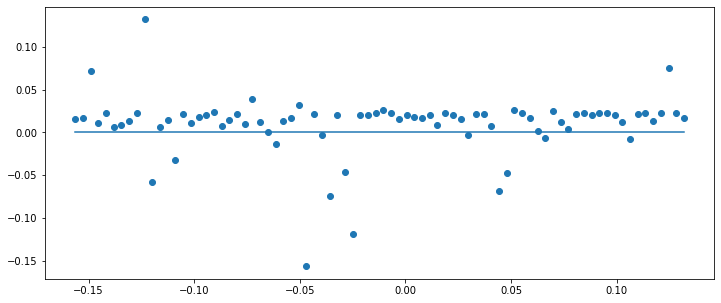

In [ ]:
predy = Ridge.predict(testx)
difference = predy - testy
plt.figure(figsize=(12, 5))
x_ = np.linspace(np.min(difference), np.max(difference), difference.shape[0])
plt.plot(x_, np.zeros(x_.shape[0]))
plt.scatter(x_, difference)
plt.show()

Також, тренувальна вибірка:

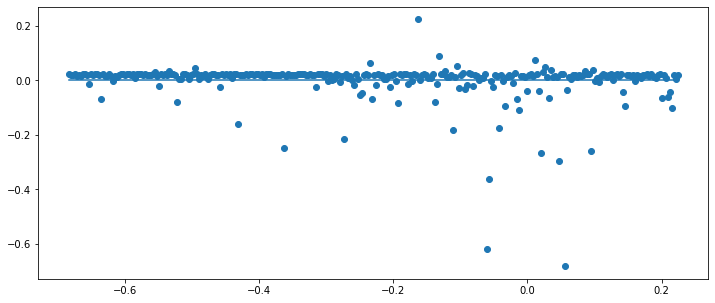

In [ ]:
predy = Ridge.predict(trainx)
difference = predy - trainy
plt.figure(figsize=(12, 5))
x_ = np.linspace(np.min(difference), np.max(difference), difference.shape[0])
plt.plot(x_, np.zeros(x_.shape[0]))
plt.scatter(x_, difference)
plt.show()

Висновок.

Звичайна лінійна регресія перевчається. Застосувавши регуляризацію, ситуація корегується, хоча точність і втрачається. Для гребеневої - не дуже критично.

Модель ОНК дала наступні результати:


*   R = 0.933
*   F = 828
*   Дисперсія - 5е-8

Після відбору параметрів за допомогую відкидання великих pvalue, коеффіцієнт детермінації не змінився, статистика фішера стала 1384, а дисперсія зменшилась на порядок (7е-9)

На діаграмі залишків видно, що різниця кучкується біля ноля, але трохи вище за потрібне значення. Це підштовхує на думку, що трохи не вірний вільний член регрессійної прямої, на це могли вплинути, наприклад, викиди (на діаграмі їх також видно).
